In [ ]:
from src.utils import *
from src.kmeans import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/College.csv')

In [3]:
data.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [4]:
# pre-processing data
data = data.iloc[:, 1:]
data['Private'] = data['Private'].map({'Yes':1, 'No':0})

In [5]:
# Splitting data
X = data.drop('Private', axis=1)
y = data.Private

In [ ]:
# Standardization
scalar = StandardScaler()
X = scalar.fit_transform(X)

### **Clustering**

In [7]:
kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans.fit(X)
print(kmeans)

**Distances to cluster centers:**


[[ 1.88281011  4.42976349]
 [ 4.78698189  6.63835684]
 [ 1.89520672  4.32763971]
 ...
 [ 1.83204227  3.59694374]
 [10.50251383  7.33270664]
 [ 3.13408098  4.15778643]] 



**Cluster Centers:**


[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.35972387]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60077594]] 



**Inertia:**


10469.53468352414 



**Cluster labels:**


[0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 

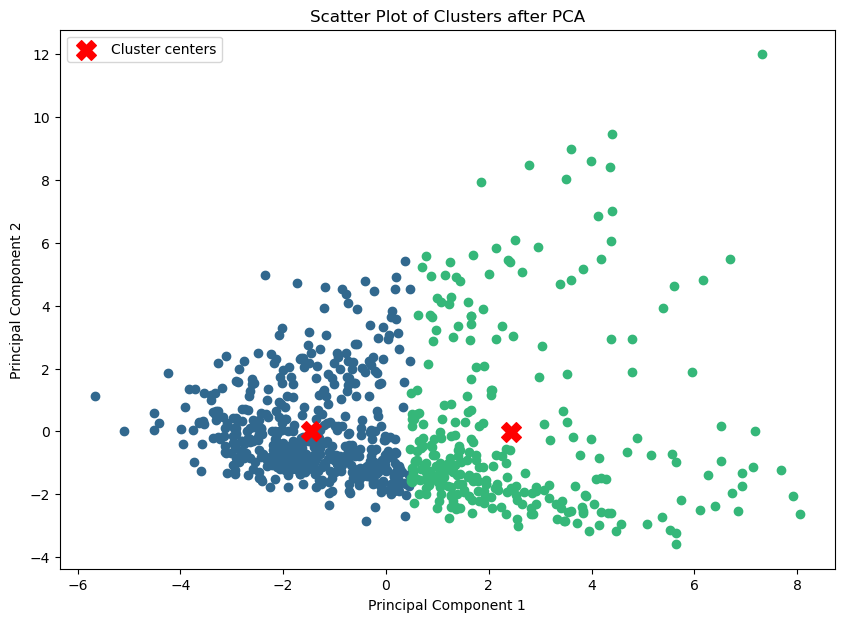

In [8]:
pca_scatter_plot_2d(X, kmeans)

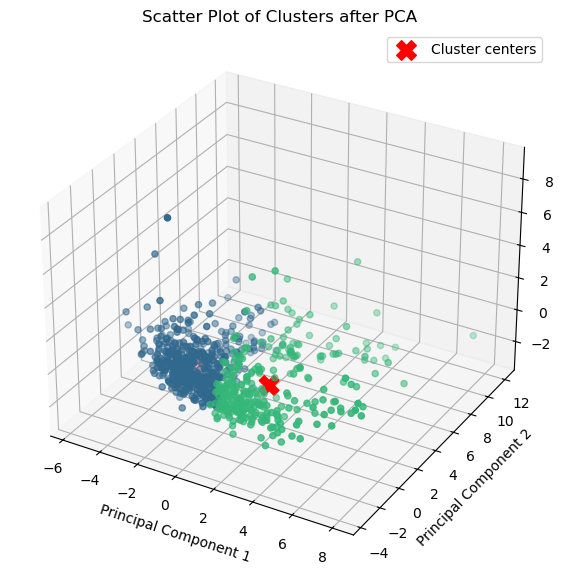

In [9]:
pca_scatter_plot_3d(X, kmeans)

### **Image Compression**

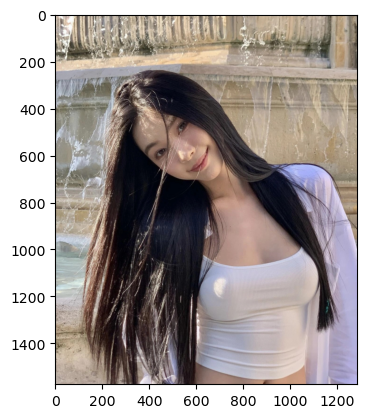

In [ ]:
img_path = 'images/photo.jpg'

# hiển thị hình ảnh gốc
display_original_image(img_path)

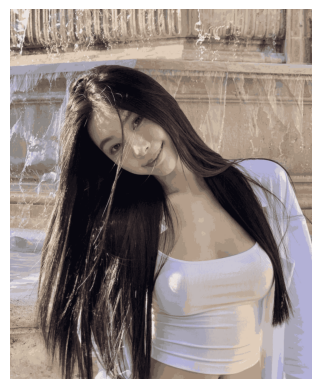

Compressed image saved as: images/compressed_image_20clusters.jpg


In [11]:
# đọc hình ảnh và convert sang mảng float numpy hai chiều (width*height, 3) duỗi hình ảnh về mảng một chiều với 2 kênh màu RBG
img, width, height = read_image(img_path)

# apply Kmeans
kmeans = KMeans(n_clusters=20, max_iter=300)
labels = kmeans.fit_predict(img)
clusters = kmeans.cluster_centers_

# hiển thị lại hình ảnh sau khi đưa về số chiều ban đầu
display_and_save_img(img, width, height, clusters, labels)